In [1]:
#pip install swifter

In [10]:
from nltk.corpus import stopwords
import nltk
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
import re

from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.feature_extraction import DictVectorizer

import json
import os

import pandas as  pd
import spacy

import seaborn as sns
import string

from tqdm import tqdm
from textblob import TextBlob

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split

import swifter

In [4]:
data = pd.read_csv('mathChatbot.csv', encoding='latin-1')

In [5]:
data

,Question,Answer,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,how do i add two numbers together?,"to add two numbers together, you simply combin...",NaN,NaN,NaN,How do I add two numbers together?,NaN,"To add two numbers together, you simply combin..."
1,what is the difference between addition and su...,addition is the process of combining two or mo...,NaN,NaN,NaN,What is the difference between addition and su...,NaN,Addition is the process of combining two or mo...
2,what is the formula for finding the area of a ...,the formula for finding the area of a rectangl...,NaN,NaN,NaN,What is the formula for finding the area of a ...,NaN,The formula for finding the area of a rectangl...
3,how do i convert fractions to decimals?,"to convert a fraction to a decimal, divide the...",NaN,NaN,NaN,How do I convert fractions to decimals?,NaN,"To convert a fraction to a decimal, divide the..."
4,what are prime numbers and how do i identify t...,prime numbers are numbers greater than 1 that ...,NaN,NaN,NaN,What are prime numbers and how do I identify t...,NaN,Prime numbers are numbers greater than 1 that ...
...,...,...,...,...,...,...,...,...
108,how many sides does a pentagon have?,a pentagon has five sides.,NaN,NaN,NaN,How many sides does a pentagon have?,NaN,A pentagon has five sides.
109,what is the largest even number less than 10?,the largest even number less than 10 is 8.,NaN,NaN,NaN,What is the largest even number less than 10?,NaN,The largest even number less than 10 is 8.
110,what is the smallest prime number?,the smallest prime number is 2.,NaN,NaN,NaN,What is the smallest prime number?,NaN,The smallest prime number is 2.
111,how many sides does a square have?,a square has four equal sides.,NaN,NaN,NaN,How many sides does a square have?,NaN,A square has four equal sides.


In [6]:
data = data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4','Unnamed: 5','Unnamed: 6','Unnamed: 7'])

<Axes: >

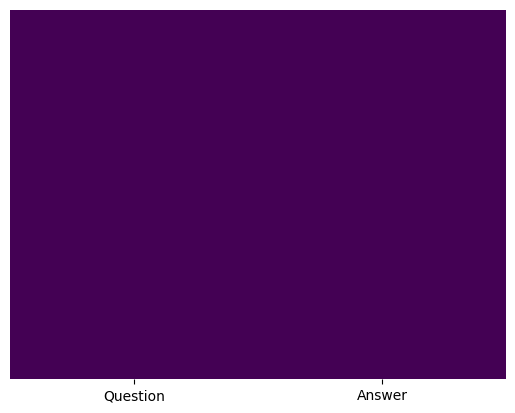

In [8]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [9]:
data.head()

,Question,Answer
0,how do i add two numbers together?,"to add two numbers together, you simply combin..."
1,what is the difference between addition and su...,addition is the process of combining two or mo...
2,what is the formula for finding the area of a ...,the formula for finding the area of a rectangl...
3,how do i convert fractions to decimals?,"to convert a fraction to a decimal, divide the..."
4,what are prime numbers and how do i identify t...,prime numbers are numbers greater than 1 that ...


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Question  113 non-null    object
 1   Answer    113 non-null    object
dtypes: object(2)
memory usage: 1.9+ KB


In [13]:
data.columns

Index(['Question', 'Answer'], dtype='object')

In [14]:
X = data.drop('Answer', axis=1)
y = data['Answer']

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [16]:
X_train, X_test, y_train, y_test

(                                             Question
 22                     how many legs does a cat have?
 89                               what is subtraction?
 30                           how do i count by fives?
 41  what is the difference between a numerator and...
 49  how do i identify different shapes in the real...
 ..                                                ...
 68            how do i find the perimeter of a shape?
 56                           how do i count by fours?
 40                how do i find the volume of a cube?
 80         how do i subtract one number from another?
 3             how do i convert fractions to decimals?
 
 [79 rows x 1 columns],
                                               Question
 7    what is the difference between odd and even nu...
 19                           how do i draw a triangle?
 111                 how many sides does a square have?
 82              how do i divide one number by another?
 94                              w

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()

In [18]:
text_clf = Pipeline([
...     ('vect', CountVectorizer(analyzer="word", stop_words="english")),
...     ('tfidf', TfidfTransformer(use_idf=True)),
...     ('clf', MultinomialNB(alpha=.01)),
... ])

In [19]:
text_clf.fit(X_train['Question'].to_list(), list(y_train))

Pipeline(steps=[('vect', CountVectorizer(stop_words='english')),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0.01))])

In [20]:
import numpy as np
X_TEST = X_test['Question'].to_list()
Y_TEST = list(y_test)

In [21]:
predicted = text_clf.predict(X_TEST)

In [22]:
test_data = ['how do i count by fives?']
predicted = text_clf.predict(test_data)
print(predicted[0])

counting by fives means adding 5 each time. start with a number, like 0, and add 5 to it: 0, 5, 10, 15, 20, and so on. keep adding 5 to the previous number to continue counting.


In [23]:
import pickle
pickle.dump(text_clf, open("chatbot_model.dat", "wb"))

In [24]:
with open('chatbot_model.dat' , 'rb') as f:
    model = pickle.load(f)

In [26]:
test_data = ['how do i count by fives?']
model.predict(test_data)

array(['counting by fives means adding 5 each time. start with a number, like 0, and add 5 to it: 0, 5, 10, 15, 20, and so on. keep adding 5 to the previous number to continue counting.'],
      dtype='<U473')

In [29]:
#text_clf.score(X_TEST,Y_TEST)